### Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading Dataset 

In [2]:
data = pd.read_csv('Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

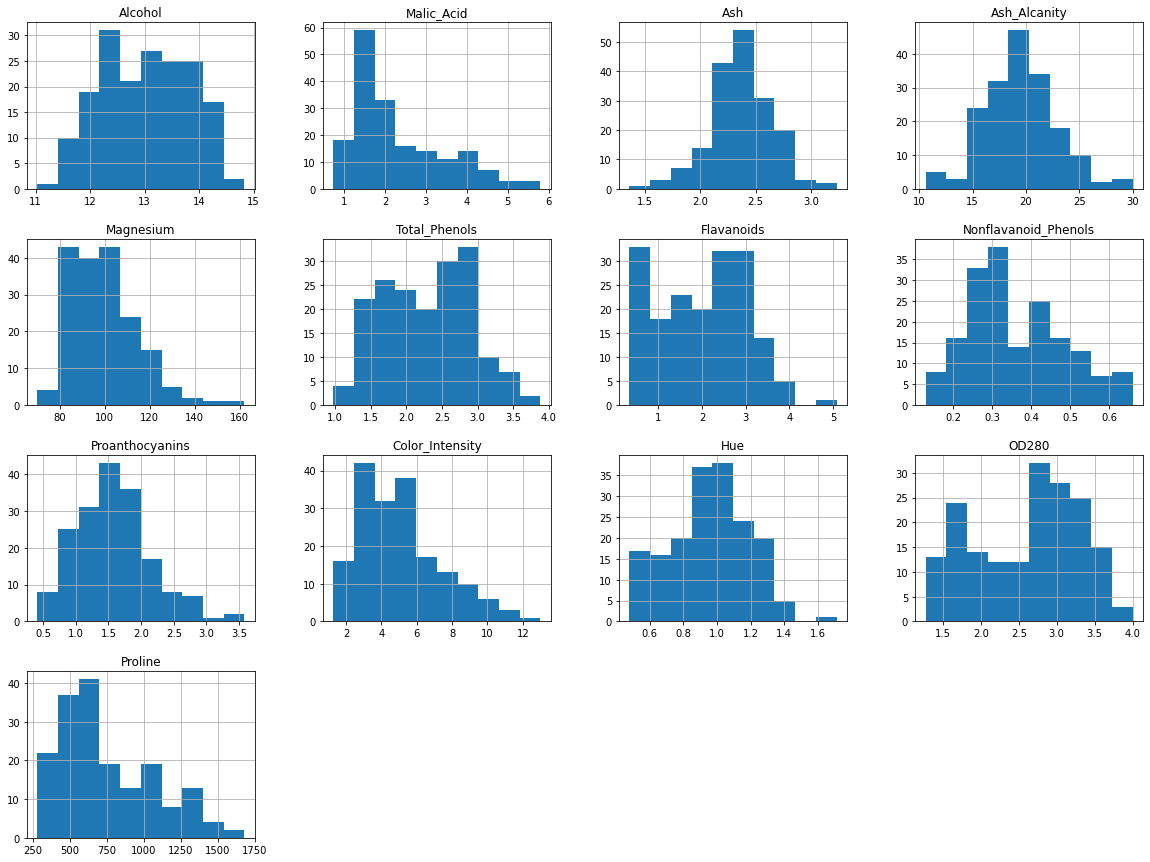

In [6]:
freq_graph = data.select_dtypes(include = ["float", "int"])
freq_graph.hist(figsize = (20, 15))
plt.show()

### Preprocessing 

In [7]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

### Outlier Detection 

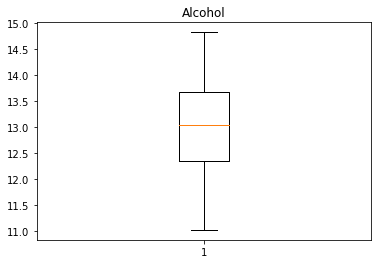

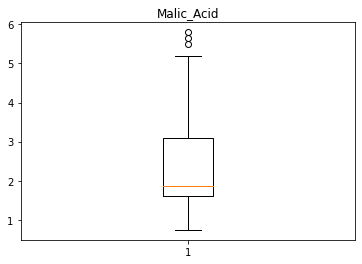

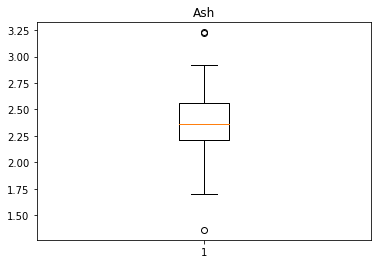

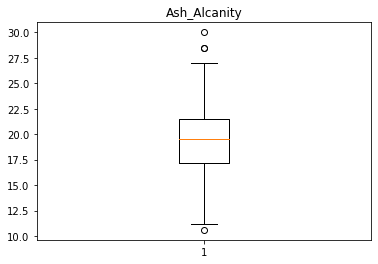

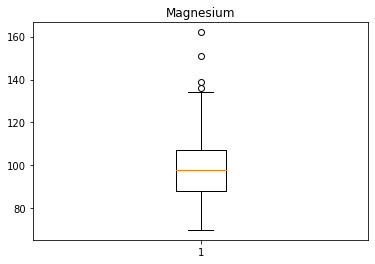

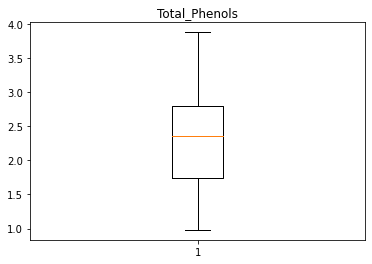

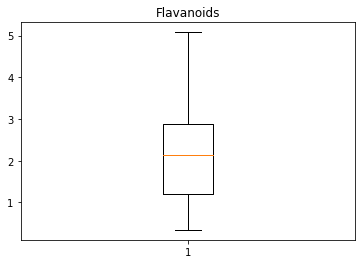

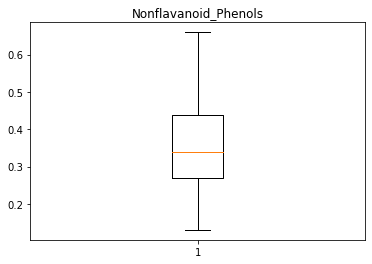

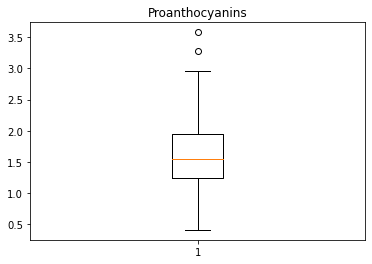

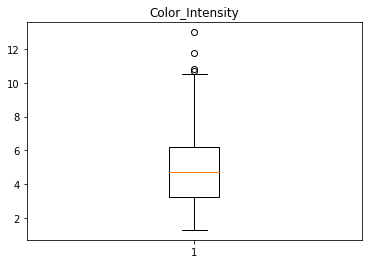

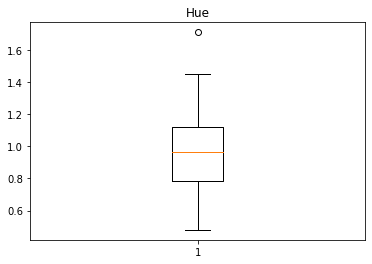

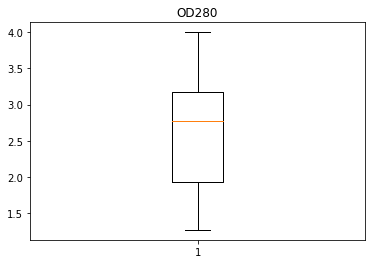

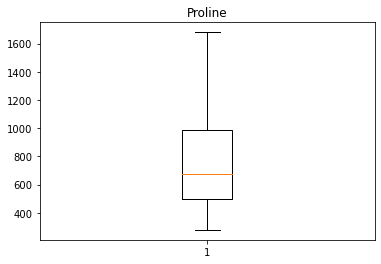

In [9]:
for i in data.columns:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [10]:
for i in data.columns:
    
    # Inter Quartile Range
    
    Q1 = np.percentile(data[i], 25,interpolation="midpoint")
    Q2 = np.percentile(data[i], 50,interpolation="midpoint")
    Q3 = np.percentile(data[i], 75,interpolation="midpoint")
    print("Interquartile range: {} \n".format(i))
    print("Q1: {}".format(Q1))
    print("Q2: {}".format(Q2))
    print("Q3: {}\n".format(Q3))
    
    IQR = Q3-Q1
    print("IQR:{}\n".format(IQR))
    
    # Limit identification
    
    low_limit = Q1-1.5*IQR
    up_limit  = Q3+1.5*IQR
    print("Lower limit : {}".format(low_limit))
    print("Upper limit : {}\n".format(up_limit))
    
    
    # Finding outlier
    
    outlier= []
    for x in data[i]:
        if ((x>up_limit) or (x<low_limit)):
            outlier.append(x)
    print("Outlier: {}\n".format(outlier))
    
    
    # Finding index colum with outlier
    
    #uperlimit outlier

    ind_up      = data[i]>up_limit
    ind_updata  = data.loc[ind_up].index
    print("Indexes greater than upperlimit: {}\n".format(ind_updata))
    
    
    # lower limit outlier
    
    ind_low     = data[i]<low_limit
    ind_lowdata = data.loc[ind_low].index
    print("Indexes less than lowerlimit: {}\n".format(ind_lowdata))
    print("\n\n")

Interquartile range: Alcohol 

Q1: 12.364999999999998
Q2: 13.05
Q3: 13.675

IQR:1.3100000000000023

Lower limit : 10.399999999999995
Upper limit : 15.640000000000004

Outlier: []

Indexes greater than upperlimit: Int64Index([], dtype='int64')

Indexes less than lowerlimit: Int64Index([], dtype='int64')




Interquartile range: Malic_Acid 

Q1: 1.605
Q2: 1.8650000000000002
Q3: 3.065

IQR:1.46

Lower limit : -0.585
Upper limit : 5.255

Outlier: [5.8, 5.51, 5.65]

Indexes greater than upperlimit: Int64Index([123, 137, 173], dtype='int64')

Indexes less than lowerlimit: Int64Index([], dtype='int64')




Interquartile range: Ash 

Q1: 2.21
Q2: 2.36
Q3: 2.5549999999999997

IQR:0.34499999999999975

Lower limit : 1.6925000000000003
Upper limit : 3.0724999999999993

Outlier: [3.22, 1.36, 3.23]

Indexes greater than upperlimit: Int64Index([25, 121], dtype='int64')

Indexes less than lowerlimit: Int64Index([59], dtype='int64')




Interquartile range: Ash_Alcanity 

Q1: 17.2
Q2: 19.5
Q3: 21.5

IQ

In [11]:
data.drop([25, 59, 69, 73, 78, 95, 110, 115, 121, 123, 127, 137, 151, 158, 159, 166, 173], inplace =  True)

In [12]:
data.head(15)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### Standard Scaling  

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
stdsclr = StandardScaler()

In [15]:
X= stdsclr.fit_transform(data)

In [16]:
type(X)

numpy.ndarray

In [17]:
X1 =pd.DataFrame(X,columns=data.columns)

In [18]:
X1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.495711,-0.571130,0.277425,-1.208619,2.309259,0.808420,1.034224,-0.643463,1.415284,0.296494,0.372149,1.826678,0.947436
1,0.200698,-0.504145,-0.928625,-2.672685,0.118914,0.570475,0.728906,-0.808165,-0.511374,-0.300438,0.418153,1.091015,0.900976
2,0.150407,0.050878,1.275535,-0.210392,0.200038,0.808420,1.217414,-0.478761,2.407227,0.315445,0.326144,0.765626,1.319115
3,1.671732,-0.341465,0.568540,-0.809329,1.173525,2.474030,1.471845,-0.972867,1.205450,1.319806,-0.455928,1.161752,2.232826
4,0.250990,0.270973,2.107293,0.588189,1.579144,0.808420,0.657665,0.262398,0.518720,-0.328863,0.372149,0.426090,-0.074682


### K Means Clustering  

#### The Elbow Method 

C:\Users\FISAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


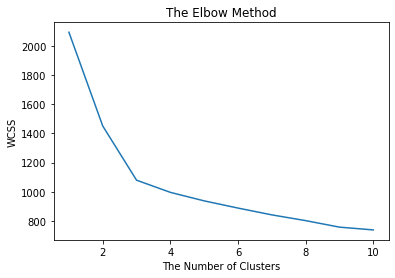

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i ,init='k-means++' ,random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('The Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
#Here the number of clusters is 3

In [21]:
kmeans = KMeans(n_clusters=4 ,init='k-means++' ,random_state=42)
y_kmeans = kmeans.fit_predict(X1)

In [22]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3])

#### Silhoutte Score 

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
sil_avg = silhouette_score(X1,y_kmeans)

In [25]:
sil_avg

0.24616383158422128

### Agglomerative Heirarchial Clustering 

#### Dendogram 

In [26]:
import scipy.cluster.hierarchy as sch

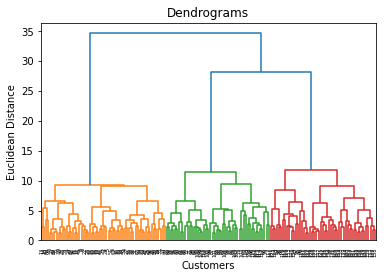

In [27]:
dendrogram = sch.dendrogram(sch.linkage(X1,method='ward'))
plt.title('Dendrograms')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean'
                            ,linkage='ward')
y_hc = hc.fit_predict(X1)

In [30]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Silhouette Score 

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
sil_avg = silhouette_score(X1,y_hc)

In [33]:
sil_avg

0.2926994028296366

### DB Scan  

In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
nbrs = NearestNeighbors(n_neighbors =26).fit(X1)

In [36]:
nb_dist,nb_ind =nbrs.kneighbors(X1)

In [37]:
sort_nb_dist =np.sort(nb_dist,axis=0)

In [38]:
nbrs

NearestNeighbors(n_neighbors=26)

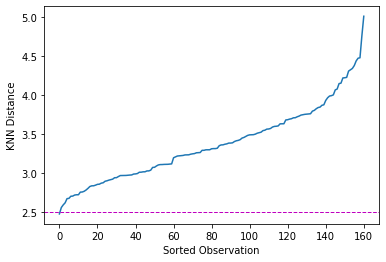

In [68]:
k_dist= sort_nb_dist[:,25]
plt.plot(k_dist)
plt.axhline(y=2.5,linewidth=1,linestyle='dashed',color='m')
plt.ylabel('KNN Distance')
plt.xlabel('Sorted Observation')
plt.show()


In [69]:
from sklearn.cluster import DBSCAN

In [70]:
# Define the model with eps=2.5 and minPts=26
dbscan = DBSCAN(eps=2.5, min_samples=26)

In [71]:
# Fit the model to the dataset
dbscan.fit(X1)

DBSCAN(eps=2.5, min_samples=26)

In [72]:
# Predict the cluster labels
labels = dbscan.labels_

In [73]:
# Print the cluster label
labels

array([-1, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,
        0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,
       -1,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [74]:
sil_avg = silhouette_score(X1,labels)

In [75]:
sil_avg

0.09101863617843622

In [ ]:
#Agglomorative Heirarchial Clustering is the Optimum no of clusters 